<a href="https://colab.research.google.com/github/lemcat55/w4StatCalc/blob/main/Week4_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**

#How to use this application
To use this application, you have to be signed in one of your Google accounts (e.g., have your Gmail open).
1.	Click the white triangle inside the black circle in the cell [1]. It is a one-time operation for the entire session - no matter how many problems you are going to solve. This operation loads necessary libraries and defines two functions that will be used for graphing results. As an alternative, you can click Run All in Runtime section of the menu at the top of the application.
2.	In Table of contents (on the left side of the application), find the type of the problem you are solving, for example, "2: Confidence Interval for Mean" and click that item. It will bring you to the code for the problem. 
You do not need to understand the code; you just need to enter your input data in first few lines of the code (until the line ############). If std refers to standard deviation of the population, use tz='z'. If std refers to standard deviation of the sample, use tz='t'.
The variable N denotes the size of a population. If N is unknown, use N=None. 
Run the code by clicking the white triangle inside the black circle of the code’s cell. The graphical and numerical results will be displayed.
3.	To solve the next problem, go to point 2 of this instruction.

# 1: Define functions for graphing the results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
def g(n,tz,mean,std,clr,x1,x2):
  i1=0
  i2=600
  left=mean-3*std
  right=mean+3*std
  x=np.linspace(left,right,i2+1)
  deltaX=6*std/i2
  if tz=='z': y1=stats.norm.pdf(x,mean,std)
  if tz=='t': y1=stats.t.pdf(x,n-1,mean,std)
  y=y1.copy()


  if x1==None:
    i2=int((x2-left)/deltaX)
    if i2>600: i2=600
    #print("i2=",i2)
    y1[0:i2:1]=0  
  elif x2==None:
    i1=int((x1-left)/deltaX)
    if i1<0: i1=0
    y1[i1:600:1]=0
  else:
    i1=int((x1-left)/deltaX)
    if i1<0: i1=0
    i2=int((x2-left)/deltaX)
    if i2>600: i2=600
    y1[0:i1:1]=0
    y1[i2:600:1]=0

  y2=0*x
  plt.rcParams["figure.figsize"]=(4,2)
  plt.fill_between(x, y1, step="pre", alpha=1, color=clr)
  plt.fill_between(x, y2, step="pre", alpha=1, color=clr)
  plt.plot(x, y1, drawstyle="steps", color="white")
  plt.plot(x, y2, drawstyle="steps", color="white")
  plt.plot(x,y)

def f(n,tz,mean,std,clr,P,side):
  if side=="left":
    if tz=='z': x1=stats.norm.ppf(P,loc=mean,scale=std)
    if tz=='t': x1=stats.t.ppf(P,n-1,loc=mean,scale=std)
    x2=None
  elif side=="right":
    x1=None
    if tz=='z': x2=stats.norm.ppf(1-P,loc=mean,scale=std)
    if tz=='t': x2=stats.t.ppf(1-P,n-1,loc=mean,scale=std)
  else:#midle
    if tz=='z': 
      x1=stats.norm.ppf((1-P)/2,loc=mean,scale=std)
      x2=stats.norm.ppf((1+P)/2,loc=mean,scale=std)
    if tz=='t': 
      x1=stats.t.ppf((1-P)/2,n-1,loc=mean,scale=std)
      x2=stats.t.ppf((1+P)/2,n-1,loc=mean,scale=std)
  
  g(n,tz,mean,std,clr,x1,x2)

# 2: Confidence Interval for Mean when population sigma is known


x1 = 120.10238013959038
x2 = 129.8976198604096
z= 2.5758293035489004
se = 1.901375938872122
ME = 4.897619860409613


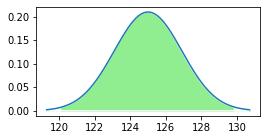

In [ ]:
##  Enter your data #################
mean=125
sigma=14
Conf=0.99
n=49
N=500
############
tz='z'
std=sigma
if not n==None: std/=np.sqrt(n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
f(n,tz,mean,std,"lightgreen",Conf,"middle")
if tz=='z':
  x1=stats.norm.ppf((1-Conf)/2,loc=mean,scale=std)
  x2=stats.norm.ppf((1+Conf)/2,loc=mean,scale=std)
  print("x1 =",x1)
  print("x2 =",x2)
  print("z=",stats.norm.ppf((1+Conf)/2,loc=0,scale=1))
if tz=='t':
  x1=stats.t.ppf((1-Conf)/2,n-1,loc=mean,scale=std)
  x2=stats.t.ppf((1+Conf)/2,n-1,loc=mean,scale=std)
  print("x1 =",x1)
  print("x2 =",x2)
  print("t =",stats.t.ppf((1+Conf)/2,n-1,loc=0,scale=1))
print("se =",std)
print("ME =",(x2-x1)/2)

# 3: Confidence Interval for Mean when population sigma is NOT known

x1 = 39.687548912384514
x2 = 44.09245108761549
t = 2.6264054563851857
se = 0.83858
ME = 2.2024510876154864


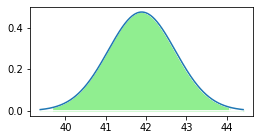

In [ ]:
##  Enter your data #################
mean=41.89
std=8.3858
Conf=0.99
n=100
N=None
############
tz='t'
std/=np.sqrt(n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
f(n,tz,mean,std,"lightgreen",Conf,"middle")
if tz=='z':
  x1=stats.norm.ppf((1-Conf)/2,loc=mean,scale=std)
  x2=stats.norm.ppf((1+Conf)/2,loc=mean,scale=std)
  print("x1 =",x1)
  print("x2 =",x2)
  print("z=",stats.norm.ppf((1+Conf)/2,loc=0,scale=1))
if tz=='t':
  x1=stats.t.ppf((1-Conf)/2,n-1,loc=mean,scale=std)
  x2=stats.t.ppf((1+Conf)/2,n-1,loc=mean,scale=std)
  print("x1 =",x1)
  print("x2 =",x2)
  print("t =",stats.t.ppf((1+Conf)/2,n-1,loc=0,scale=1))
print("se =",std)
print("ME =",(x2-x1)/2)

# 4: Confidence Interval for Proportion when Sample Proportion pHat is Known

Sample Proportion = 0.53
se = 0.04990991885387112
z = 2.5758293035489004
Margine of Error = 0.12855943152154897
x1 = 0.40144056847845105
x2 = 0.658559431521549


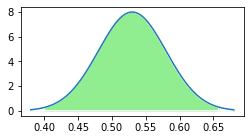

In [ ]:
##  Enter your data #################
Conf=0.99
n=100
pHat=0.53
N=None
############
mean=pHat
z=stats.norm.ppf((1+Conf)/2,loc=0,scale=1)
se=np.sqrt(pHat*(1-pHat)/n)
if not N==None:
  se*=np.sqrt((N-n)/(N-1))
print('Sample Proportion =',pHat)
print('se =',se)
print('z =',z)
me=z*se
print('Margine of Error =',me)
x1=pHat-me
x2=pHat+me
print("x1 =",x1)
print("x2 =",x2)
f(n,'z',mean,se,"lightgreen",Conf,"middle")

# 5: Confidence Interval for Proportion when Number of Successes is Known

Sample Proportion = 0.53
se = 0.04990991885387112
z = 2.5758293035489004
Margine of Error = 0.12855943152154897
x1 = 0.40144056847845105
x2 = 0.658559431521549


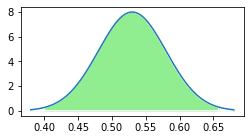

In [ ]:
##  Enter your data #################
Conf=0.99
n=100
nSuccesses=53
N=None
############
pHat=nSuccesses/n
z=stats.norm.ppf((1+Conf)/2,loc=0,scale=1)
se=np.sqrt(pHat*(1-pHat)/n)
if not N==None:
  se*=np.sqrt((N-n)/(N-1))
print('Sample Proportion =',pHat)
print('se =',se)
print('z =',z)
me=z*se
print('Margine of Error =',me)
x1=pHat-me
x2=pHat+me
print("x1 =",x1)
print("x2 =",x2)
f(n,'z',pHat,se,"lightgreen",Conf,"middle")

# 6: Minimum Sample Size for Mean

In [ ]:
##  Enter your data #################
Conf=0.90
std=4
error=1
########################
z=stats.norm.ppf((1+Conf)/2,loc=0,scale=1)
n=z*std/error
n=np.ceil(n*n)
print("n =",int(n))
print("z =",z)

n = 44
z = 1.6448536269514722


# 7: Minimum Sample Size for Proportion

In [ ]:
##  Enter your data #################
Conf=0.98
pHat=0.4
error=0.03
########################
z=stats.norm.ppf((1+Conf)/2,loc=0,scale=1)
n=z/error
n=np.ceil(n*n*pHat*(1-pHat))
print("n =",int(n))
print("z =",z)

n = 1444
z = 2.3263478740408408
